# Module 1 Project- Collin Loo and Cary Mosley

In [426]:
#import the modules and read in the data file
import pandas as pd
import numpy as np
import re
import lxml
import seaborn as sns
import matplotlib as plt

%matplotlib inline
df = pd.read_csv('mergedData.csv')

Index(['Title', 'Year', 'Genre', 'Rating', 'Score', 'Director', 'Stars',
       'Gross', 'Popularity', 'Vote_Count', 'Id', 'Original_Language',
       'Original_Title', 'Genre_Ids', 'Vote_Average', 'Release_Date',
       'Revenue', 'Budget', 'Genre_y'],
      dtype='object')

0       Kang-ho Song, Sun-kyun Lee, Yeo-jeong Jo, Woo-...
1       Elisabeth Moss, Oliver Jackson-Cohen, Harriet ...
2       Daniel Craig, Chris Evans, Ana de Armas, Jamie...
3       Ben Schwartz, James Marsden, Jim Carrey, Tika ...
4       Roman Griffin Davis, Thomasin McKenzie, Scarle...
                              ...                        
3995    Jean Reno, Christina Applegate, Christian Clav...
3996    Laura Linney, Philip Seymour Hoffman, Philip B...
3997    Morris Chestnut, Regina Hall, Romany Malco, Mi...
3998    Barbra Streisand, Seth Rogen, Julene Renee, Za...
3999    Diane Keaton, Geraldine Page, Kristin Griffith...
Name: Stars, Length: 4000, dtype: object

In [427]:
#cleaning some data/removing a few outliers
df = df.loc[df['Budget'] != 0]
df['Log Gross']= np.log(df['Gross'])
df['Budget'] = df['Budget']*1000000
df['Log Budget']= np.log(df['Budget'])
df = df.loc[df['Score'] >= 1]
df = df.loc[df['Popularity'] <= 105]
df['ROI']=df['Gross']/df['Budget']
df = df.loc[df['ROI']<=10]
df = df.loc[df['ROI']>=.01]
df = df.loc[df['Rating']>0.5]

We want to know whether a movies "quality' based on either IMDB rating, metacritic score, or the Movie DB popularity has a strong correlation with the gross revenue for a movie. Surpisingly it doesn't! The correlations we found were all quite low between each of these quality metrics and the movie's gross. We looked at Log of the gross to make sure the correlation wasn't being ruined by outliers and found the same results. We looked at this versus ROI also and found a similar low level of correlation

In [416]:
df['Gross'].describe()

count    3.142000e+03
mean     6.444734e+07
std      7.729471e+07
min      2.924370e+05
25%      1.816545e+07
50%      4.082974e+07
75%      7.986814e+07
max      8.583730e+08
Name: Gross, dtype: float64

0.20876960148494522

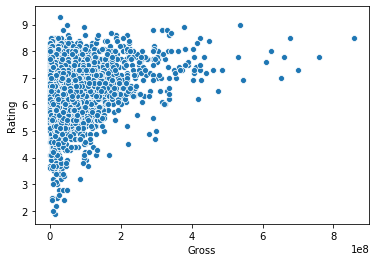

In [417]:
#scatter plot and correlation of IMDB rating and gross revenue
ax = sns.scatterplot(x = 'Gross',y = 'Rating', data = df)
df['Gross'].corr(df['Rating'])

0.09437081078840323

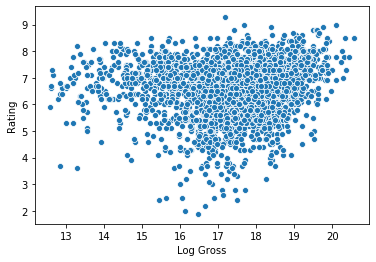

In [418]:
#scatter plot and correlation of IMDB rating and log gross revenue
ax = sns.scatterplot(x = 'Log Gross',y = 'Rating', data = df)
df['Log Gross'].corr(df['Rating'])

0.1854604139583225

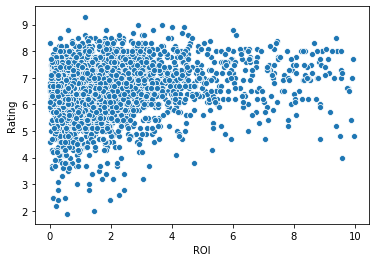

In [419]:
#scatter plot and correlation of IMDB rating and ROI
ax = sns.scatterplot(x = 'ROI',y = 'Rating', data = df)
df['ROI'].corr(df['Rating'])

0.17785312012664042

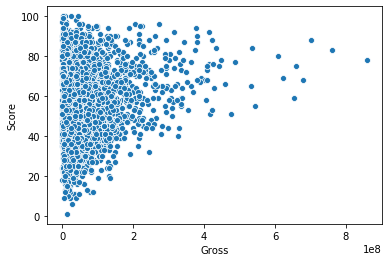

In [420]:
#scatter plot and correlation of metacritic score and gross revenue
ax = sns.scatterplot(x = 'Gross',y = 'Score', data = df)
df['Gross'].corr(df['Score'])

0.04572111833794557

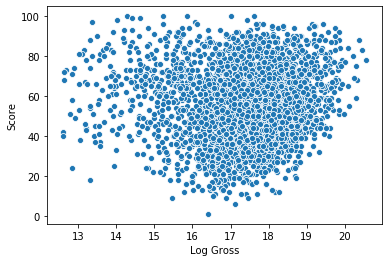

In [421]:
#scatter plot and correlation of metacritic score and log gross revenue
ax = sns.scatterplot(x = 'Log Gross',y = 'Score', data = df)
df['Log Gross'].corr(df['Score'])

0.20019909343369477

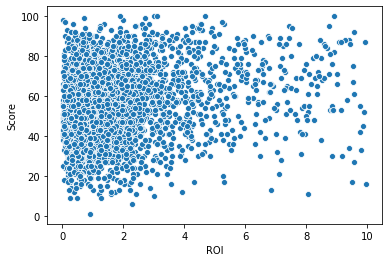

In [422]:
#scatter plot and correlation of metacritic score and ROI
ax = sns.scatterplot(x = 'ROI',y = 'Score', data = df)
df['ROI'].corr(df['Score'])

We found a stronger correlation between Popularity and Gross which makes sense 

0.4325804539872567

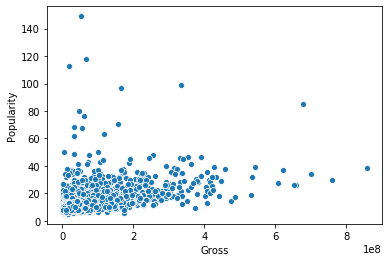

In [423]:
#scatter plot and correlation of the Movie DB popularity and gross revenue
ax = sns.scatterplot(x = 'Gross',y = 'Popularity', data = df)
df['Gross'].corr(df['Popularity'])

0.3342881823107569

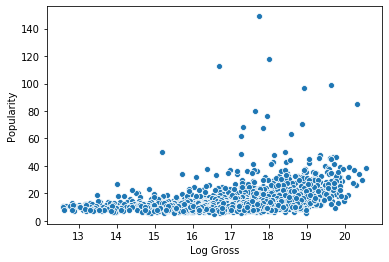

In [424]:
#scatter plot and correlation of the Movie DB popularity and log gross revenue
ax = sns.scatterplot(x = 'Log Gross',y = 'Popularity', data = df)
df['Log Gross'].corr(df['Popularity'])

0.06480325554579171

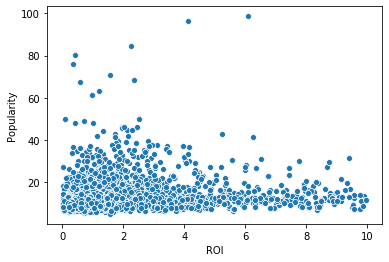

In [440]:
#scatter plot and correlation of the Movie DB popularity and gross revenue
ax = sns.scatterplot(x = 'ROI',y = 'Popularity', data = df)
df['ROI'].corr(df['Popularity'])


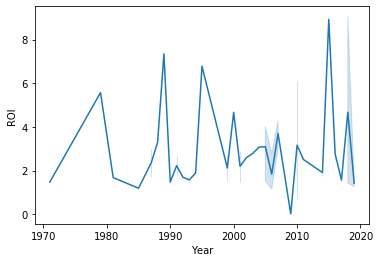

In [441]:
#looking at ROI over time

yvalues = df['ROI'].groupby(df['Year']).mean()
sns.lineplot(x = df['Year'], y = yvalues)

In [308]:
score = df[['Director','Gross','Score','ROI']].groupby('Score').mean().sort_values('Gross', ascending = False)

rating = df[['Director','Gross','Rating','ROI']].groupby('Rating').mean().sort_values('Gross', ascending = False)

genres = df[['Director','Gross','Genre','ROI']].groupby('Genre').mean().sort_values('Gross', ascending = False)


In [309]:
score['Score']=score.index
rating['Rating']=rating.index
genres['Genres']=genres.index
rating['Log Gross']=np.log(rating['Gross'])
score.reset_index(drop = True, inplace = True)
rating.reset_index(drop = True, inplace = True)
genres.reset_index(drop = True, inplace = True)

0.2081650421831829

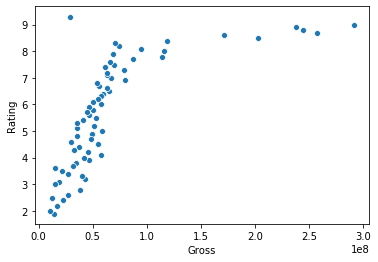

0.09212710149988791

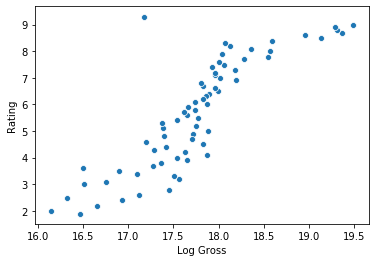

0.20473678045673213

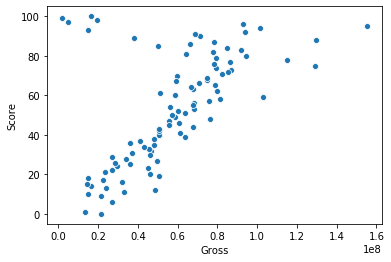

0.19385666437137636

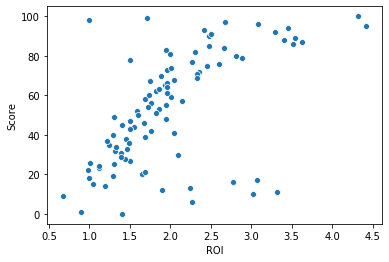

,Title,Year,Genre,Rating,Score,Director,Stars,Gross,Popularity,Vote_Count,...,Original_Title,Genre_Ids,Vote_Average,Release_Date,Revenue,Budget,Genre_y,Log Gross,Log Budget,ROI
0,Parasite,2019,Comedy Drama Thriller,8.6,96.0,Bong Joon Ho,"Kang-ho Song, Sun-kyun Lee, Yeo-jeong Jo, Woo-...",51479136,148.987,4756,...,기생충,"[35, 18, 53]",8.6,2019-05-30,201.06,11360000.0,"['Comedy', 'Drama', 'Thriller']",17.756687,16.245609,4.531614
1,The Invisible Man,2020,Horror Mystery Sci-Fi,7.6,71.0,Leigh Whannell,"Elisabeth Moss, Oliver Jackson-Cohen, Harriet ...",28205665,215.930,174,...,The Invisible Man,"[27, 9648, 878, 53]",7.5,2020-02-26,0.00,9000000.0,"['Horror', 'Mystery', 'Science Fiction', 'Thri...",17.155033,16.012735,3.133963
2,Knives Out,2019,Comedy Crime Drama,8.0,82.0,Rian Johnson,"Daniel Craig, Chris Evans, Ana de Armas, Jamie...",164655243,96.543,2485,...,Knives Out,"[35, 80, 18, 9648, 53]",7.8,2019-11-27,163.70,40000000.0,"['Comedy', 'Crime', 'Drama', 'Mystery', 'Thril...",18.919364,17.504390,4.116381
3,Sonic the Hedgehog,2020,Action Adventure Comedy,6.8,47.0,Jeff Fowler,"Ben Schwartz, James Marsden, Jim Carrey, Tika ...",128555045,217.757,546,...,Sonic the Hedgehog,"[28, 35, 878, 10751]",7.1,2020-02-12,265.49,85000000.0,"['Action', 'Comedy', 'Science Fiction', 'Family']",18.671868,18.258162,1.512412
4,Jojo Rabbit,2019,Comedy Drama War,8.0,58.0,Taika Waititi,"Roman Griffin Davis, Thomasin McKenzie, Scarle...",33122789,68.363,2208,...,Jojo Rabbit,"[35, 18, 10752]",8.1,2019-10-18,82.47,14000000.0,"['Comedy', 'Drama', 'War']",17.315732,16.454568,2.365914


In [188]:
df['Genre'] = df['Genre'].apply(lambda x:x.split())
df['Genre1'] = df['Genre'].apply(lambda x:x[0]


In [189]:
def list_Split(list):
    """Returns the second element in the list if present if not returns the first"""
    try:
        x = list[1]
    except:
        x = list[0]
    return x
def list_Split2(list):
    """Returns the third element in the list if present if not returns the first"""
    try:
        x = list[2]
    except:
        x = list[0]
    return x


In [191]:
df['Genre2'] = df['Genre'].apply(lambda x:genres_Split(x))
df['Genre3'] = df['Genre'].apply(lambda x:genres_Split2(x))



In [192]:
type(df['Stars'][0])

str

In [338]:
stars = df['Stars'].str.split(",",n=1,expand = True)

In [339]:
df['Star1'] = stars[0]
df['Star2'] = stars[1]

In [340]:
stars2 = df['Star2'].str.split(",",n=1,expand = True)

In [341]:
df['Star2'] = stars2[0]

In [358]:
test = df.groupby('Star1').count()


In [363]:
stars = df[['Star1', 'Star2','Gross','ROI', 'Log Gross']].groupby('Star1').median().sort_values('ROI', ascending = False)
stars2 = df[['Star1', 'Star2','Gross','ROI', 'Log Gross']].groupby('Star2').median().sort_values('ROI', ascending = False)



In [362]:
stars.columns

Index(['Gross', 'ROI', 'Log Gross'], dtype='object')

In [364]:
stars2

,Gross,ROI,Log Gross
Star2,,,
John Shepherd,21930418.0,9.968372,16.903385
John Randolph,29800000.0,9.933333,17.210019
Dennis Alexio,14697005.0,9.798003,16.503154
Lori Singer,80035402.0,9.760415,18.197980
Apollonia Kotero,70261052.0,9.758479,18.067728
...,...,...,...
Jean-Louis Trintignant,301718.0,0.022185,12.617248
David Crow,605562.0,0.015139,13.313912
Gabriel Bateman,1115008.0,0.014867,13.924372


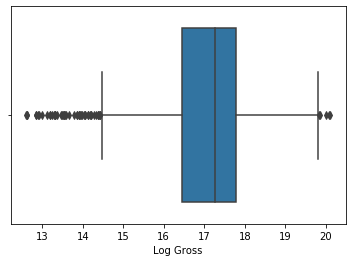

In [365]:
sns.boxplot(stars['Log Gross'])

In [377]:
stars_greater1 = stars.loc[stars['ROI']>=1]
stars_greater1.describe()

,Gross,ROI,Log Gross
count,7.230000e+02,723.000000,723.000000
mean,5.729436e+07,2.621610,17.394894
std,6.519404e+07,1.739400,0.984812
min,4.440980e+05,1.000455,13.003801
25%,2.258550e+07,1.374547,16.898907
50%,4.089633e+07,2.086294,17.501854
75%,6.500827e+07,3.135034,17.968786
max,5.436380e+08,9.968372,20.113794


Text(0.5, 1.0, 'Distribution of ROI by Star')

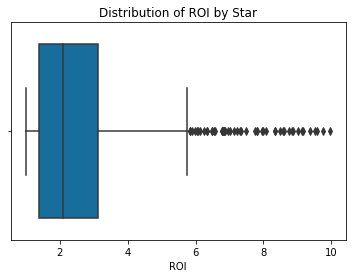

In [376]:
bplot = sns.boxplot(stars_greater1['ROI'],palette = 'colorblind')
bplot.axes.set_title('Distribution of ROI by Star')

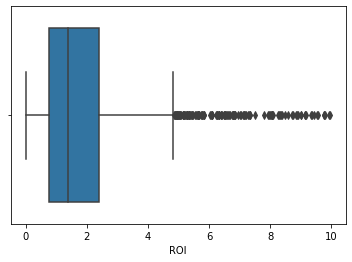

In [368]:
sns.boxplot(stars2['ROI'])

In [369]:
stars2_greater1 = stars2.loc[stars2['ROI']>=1]

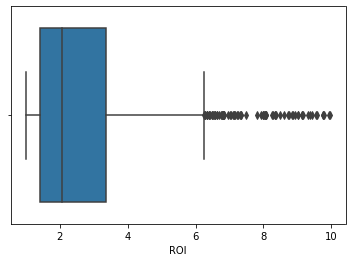

In [372]:
sns.boxplot(stars2_greater1['ROI'])